In [1]:
# import packages

import scipy.io as sio  # for loading matlab data

import numpy as np      # for numerical libs

from matplotlib.ticker import FuncFormatter # for custom bar plot labels

import matplotlib.pyplot as plt  # for plotting

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [2]:
data = sio.loadmat('GOOG_20141103.mat')

In [3]:
LOB=data['LOB']

t = (np.array((LOB['EventTime'][0][0][:,0]))-3600000*9.5)*1e-3
bid = np.array(LOB['BuyPrice'][0][0]*1e-4)
bidvol = np.array(LOB['BuyVolume'][0][0]*1.0)
ask = np.array(LOB['SellPrice'][0][0]*1e-4)
askvol = np.array(LOB['SellVolume'][0][0]*1.0)
MO=np.array(LOB['MO'][0][0]*1.0)
dt = t[1]-t[0]

In [4]:
midprice = 0.5*(bid[:,0]+ask[:,0])
microprice= (bid[:,0]*askvol[:,0]+ask[:,0]*bidvol[:,0])/(bidvol[:,0]+askvol[:,0])
spread = ask[:,0]-bid[:,0]

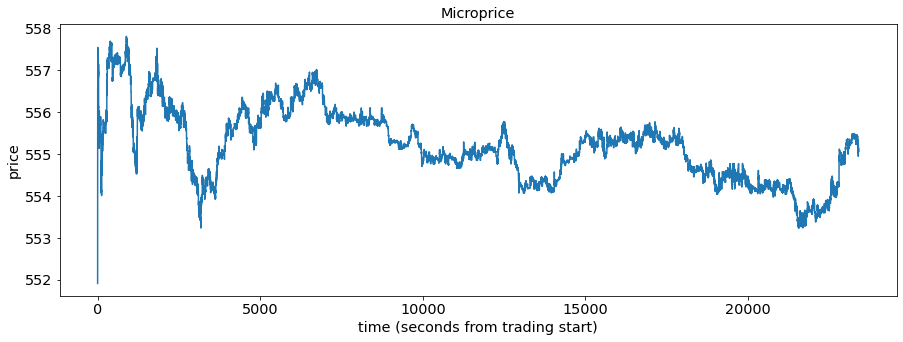

In [5]:
plt.plot(t, microprice)
plt.title('Microprice')
plt.ylabel('price')
plt.xlabel('time (seconds from trading start)')
plt.show()

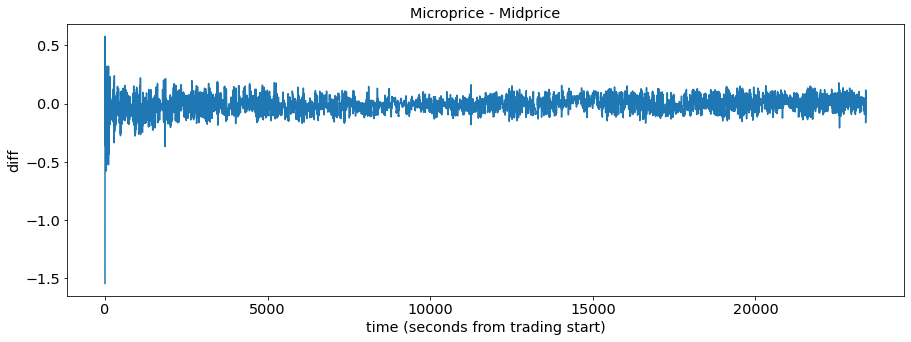

In [6]:
plt.plot(t, microprice-midprice)
plt.title('Microprice - Midprice')
plt.ylabel('diff')
plt.xlabel('time (seconds from trading start)')
plt.show()

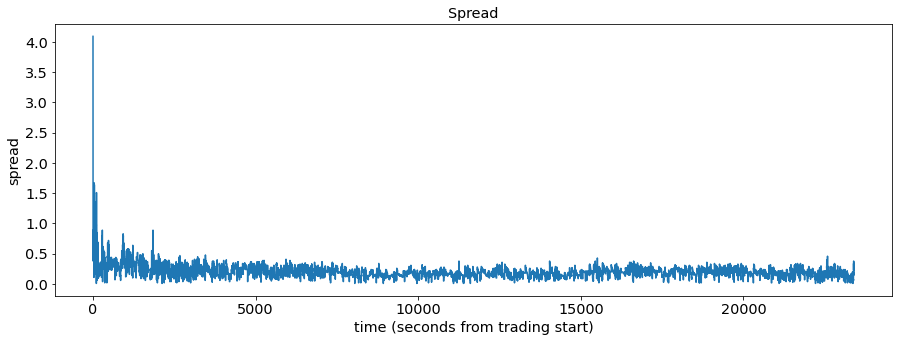

In [7]:
plt.plot(t,spread)
plt.title('Spread')
plt.ylabel('spread')
plt.xlabel('time (seconds from trading start)')
plt.show()

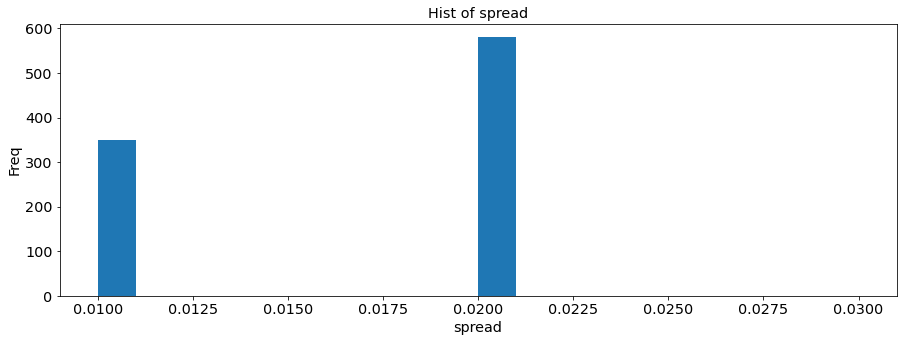

In [8]:
plt.hist(spread,bins=[0.01,0.02,0.03], width=0.001,align='mid') 
plt.title("Hist of spread")
plt.xlabel(r'spread')
plt.ylabel('Freq')
plt.show()

In [9]:
rho = np.array((bidvol[:,0]-askvol[:,0])/(bidvol[:,0]+askvol[:,0]),ndmin=2).T

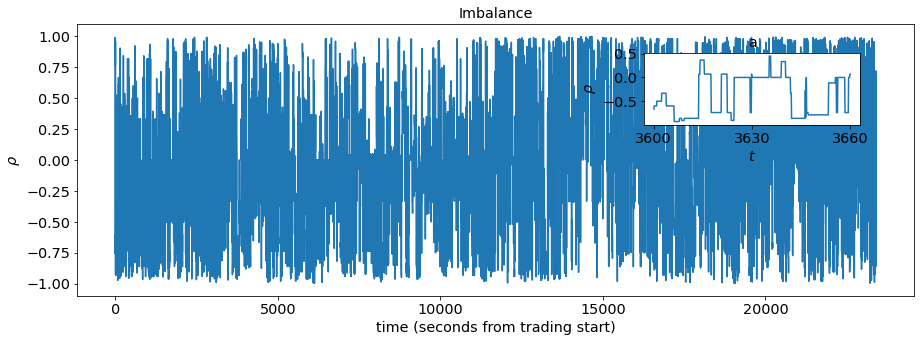

In [11]:
plt.plot(t, rho)
plt.title('Imbalance')
plt.ylabel(r'$\rho$')
plt.xlabel('time (seconds from trading start)')

a = plt.axes([.65, .6, .2, .2])
idx = (t>3600) & (t<=3600+60)
plt.plot( t[idx], rho[idx])
plt.title('a')
plt.ylabel(r'$\rho$')
plt.xlabel(r'$t$')
plt.xticks([3600,3630,3660])

plt.show()


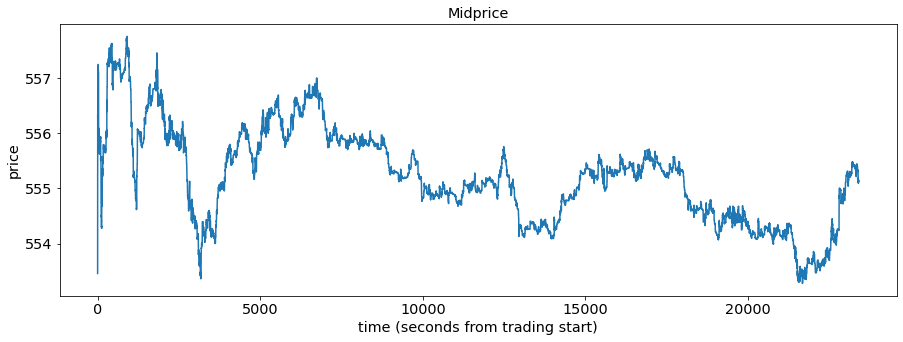

In [12]:
plt.plot(t, midprice)
plt.title('Midprice')
plt.ylabel('price')
plt.xlabel('time (seconds from trading start)')
plt.show()

In [20]:
import pandas as pd

In [26]:
df = pd.DataFrame(midprice)
df

,0
0,553.455
1,554.430
2,554.430
3,554.430
4,554.340
...,...
233995,555.125
233996,555.145
233997,555.145
233998,555.145


In [29]:
df.describe()

,0
count,234000.000000
mean,555.214536
std,0.857565
min,553.275000
25%,554.555000
50%,555.220000
75%,555.805000
max,557.760000


In [32]:
df = pd.DataFrame(spread)
df

,0
0,4.09
1,1.50
2,1.50
3,1.50
4,1.32
...,...
233995,0.19
233996,0.15
233997,0.15
233998,0.15


In [33]:
df.describe()

,0
count,234000.000000
mean,0.204888
std,0.095706
min,0.010000
25%,0.150000
50%,0.190000
75%,0.240000
max,4.090000


In [34]:
df = pd.DataFrame(microprice)
df

,0
0,551.912281
1,554.977297
2,554.977297
3,554.822857
4,554.916896
...,...
233995,555.059595
233996,555.110431
233997,555.123444
233998,555.123444


In [35]:
df.describe()

,0
count,234000.000000
mean,555.204769
std,0.848655
min,551.912281
25%,554.550244
50%,555.210000
75%,555.785000
max,557.804839
